<a href="https://colab.research.google.com/github/mehulpuri/ML/blob/main/Logistic_Regression_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

<ipython-input-1-f2042ff37b6f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
#1 Generate Dummy Data
X, y = make_blobs(n_samples=2000, n_features=2, centers=2, random_state=42, cluster_std=3)
n_features=2
print(X.shape, y.shape)

(2000, 2) (2000,)


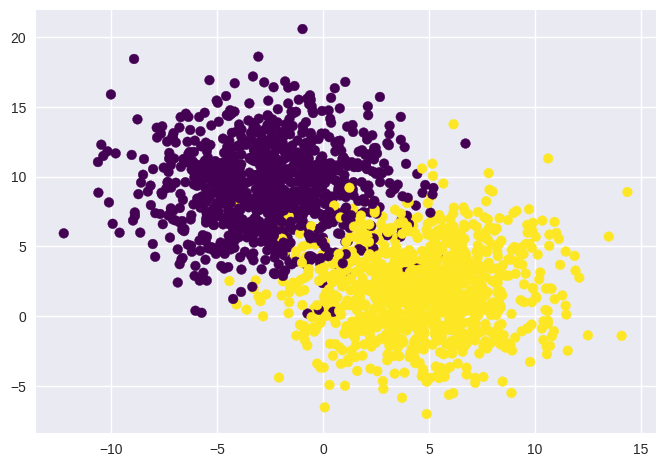

In [ ]:
#2Visualise the Dataset
def visualise(X,y):
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
  plt.show()
visualise(X,y)

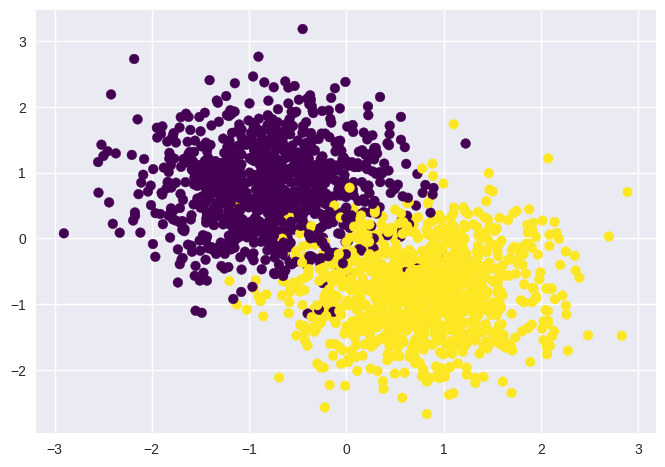

In [ ]:
#3 Normalize data
# We need 0 mean and 1 standard deviation for our data, right now the scales of both our data is different
def normalize(X):
  u=X.mean(axis=0)
  std = X.std(axis=0)
  return (X-u)/std
X=normalize(X)
visualise(X,y)

In [ ]:
#Train Test Split
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0 )


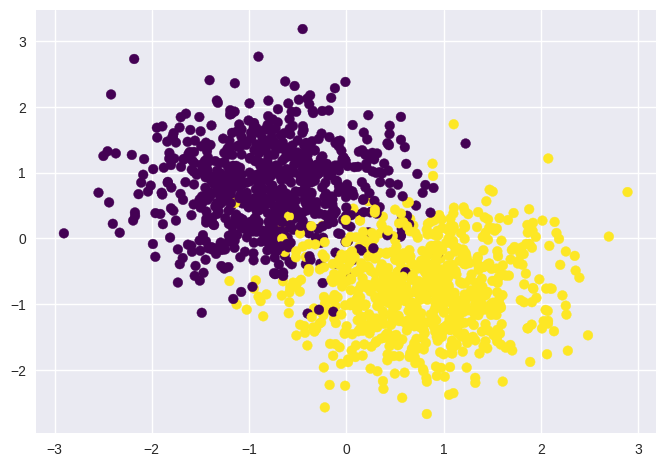

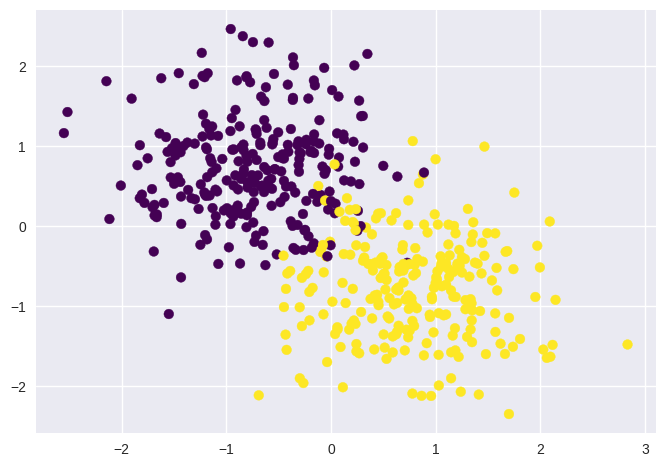

In [ ]:
visualise(XT, yT)
visualise(Xt, yt)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


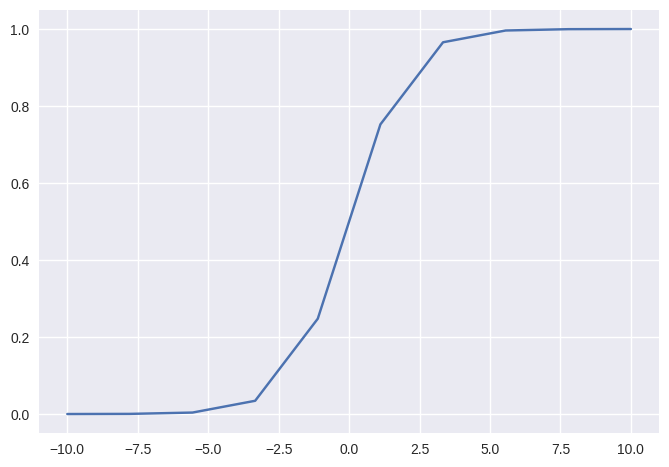

In [ ]:
#Model, making the line that separates the data
def sigmoid(z):
  return 1/(1+np.exp(-z))

z=np.linspace(-10,10,10)
print(x)
plt.plot(z, sigmoid(z))

2


In [ ]:
#Preprocessing X to add extra column
def preprocess(X):
  if X.shape[1]==n_features:
    ones = np.ones((X.shape[0],1))
    X=np.hstack((ones, X))
  return X
X=preprocess(X)
XT=preprocess(XT)
Xt=preprocess(Xt)


In [ ]:
#Model Cont.
def hypothesis(X, theta):
  return sigmoid(np.dot(X, theta))

# Binary Cross Entropy J(theta)
def error(y, yp):
  loss = -np.mean(y*np.log(yp)+ (1-y)*np.log(1-yp))
  return loss

#Gradient
def gradient(X, y, yp):
  m=X.shape[0]
  grad= -(1/m)*np.dot(X.T, (y-yp))
  return grad

#Training Loop
def train(X, y, max_iters=300, learning_rate=0.3):
  theta=np.random.randn(n_features+1, 1)
  error_list=[]

  for i in range(max_iters):
    yp=hypothesis(X, theta)
    e = error(y, yp)
    error_list.append(e)
    grad = gradient(X, y, yp)

    theta = theta-learning_rate*grad

  plt.plot(error_list)
  return theta


In [ ]:
print(XT.shape)
print(yT.shape)
# need to reshape yT
yT=yT.reshape(-1, 1) #same number of rows and one column
yt =yt.reshape(-1,1)
print(yT.shape)


(1500, 3)
(1500, 1)
(1500, 1)


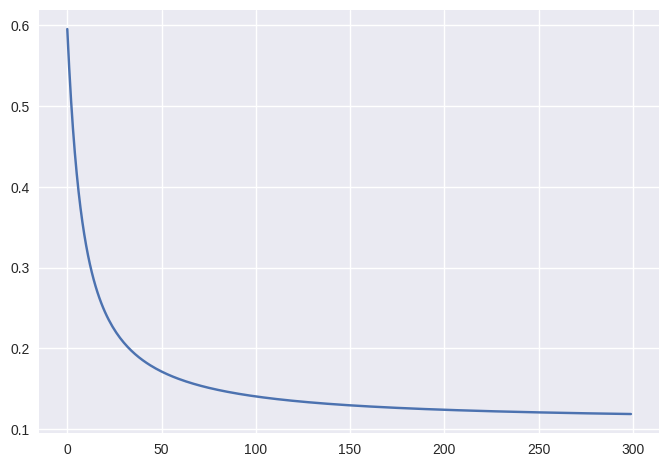

In [ ]:
theta = train(XT,yT)

In [ ]:
theta

array([[ 0.05098255],
       [ 2.83405569],
       [-2.94191686]])

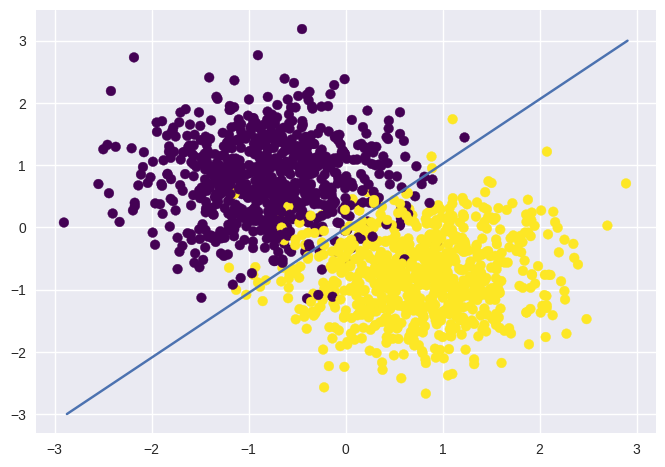

In [ ]:
#Now we plot the line using the weights obtained
plt.scatter(XT[:, 1], XT[:, 2], c=yT, cmap="viridis")

# now we sample somepoints bw -3 to 3
x1= np.linspace(-3,3,6)
# and we calculate x2 for them

x2 = -(theta[0]+theta[1]*x1)/theta[2]

plt.plot(x2, x1)
plt.show()


In [ ]:
#Predictions
hypothesis(Xt, theta) # gives probability values for each sample
# Now we decide threshold, it depends on problem statement, in our case we will give 50% threshold
def predict(X, theta):
  h=hypothesis(X, theta)
  preds = np.zeros((X.shape[0], 1),dtype='int')
  preds[h>=0.5] = 1
  return preds
preds = predict(Xt, theta)
preds

In [ ]:
#Checking Accuracy
def accuracy(X, y, theta):
  preds = predict(X, theta)
  m=y.shape[0]
  return ((sum((y==preds)))/m)*100

accuracy(XT, yT, theta)

array([95.86666667])

In [ ]:
accuracy(Xt, yt, theta)

array([96.2])

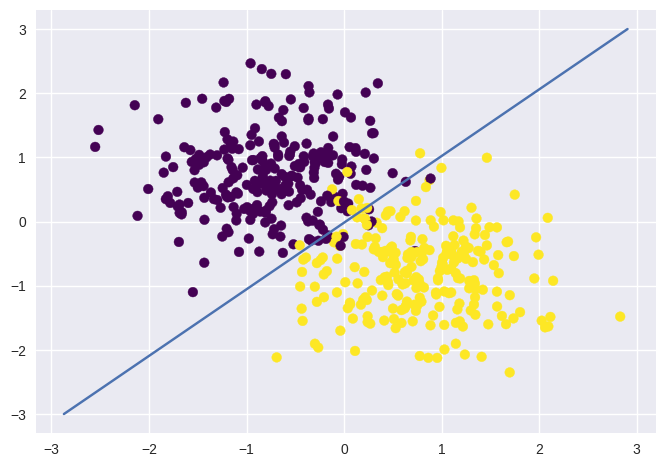

In [ ]:
#Now we plot the line using the weights obtained
plt.scatter(Xt[:, 1], Xt[:, 2], c=yt, cmap="viridis")

# now we sample somepoints bw -3 to 3
x1= np.linspace(-3,3,6)
# and we calculate x2 for them

x2 = -(theta[0]+theta[1]*x1)/theta[2]

plt.plot(x2, x1)
plt.show()